# Classification Model

### problem definition

- predict if a patient will face heart diesease in the future

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### get the data

In [2]:
df = pd.read_csv('heart.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    object 
 2   chest_pain  303 non-null    object 
 3   rest_bp     303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   rest_ecg    303 non-null    object 
 7   max_hr      303 non-null    int64  
 8   exang       303 non-null    int64  
 9   old_peak    303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          299 non-null    float64
 12  thal        301 non-null    object 
 13  disease     303 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 33.3+ KB


### cleanse the data

In [4]:
# remove the NA values from ca column
df['ca'].fillna(df['ca'].mean(), inplace=True)

In [11]:
print(df['thal'].mode()[0])
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

normal


In [18]:
from scipy import stats

# get the mode of thal column as it is a textual column
mode_thal = stats.mode(df['thal']).mode[0]
df['thal'].fillna(mode_thal, inplace=True)
print(f"mode of thal column: {mode_thal}")

mode of thal column: normal


In [12]:
df.isna().sum()

age           0
sex           0
chest_pain    0
rest_bp       0
chol          0
fbs           0
rest_ecg      0
max_hr        0
exang         0
old_peak      0
slope         0
ca            0
thal          0
disease       0
dtype: int64

#### convert the textual columns to numberic ones

In [23]:
from sklearn.preprocessing import LabelEncoder

# create the encoder
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['chest_pain'] = LabelEncoder().fit_transform(df['chest_pain'])
df['rest_ecg'] = LabelEncoder().fit_transform(df['rest_ecg'])
df['thal'] = LabelEncoder().fit_transform(df['thal'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   chest_pain  303 non-null    int64  
 3   rest_bp     303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   rest_ecg    303 non-null    int64  
 7   max_hr      303 non-null    int64  
 8   exang       303 non-null    int64  
 9   old_peak    303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          299 non-null    float64
 12  thal        303 non-null    int64  
 13  disease     303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'chol', 'fbs', 'rest_ecg',
       'max_hr', 'exang', 'old_peak', 'slope', 'ca', 'thal', 'disease'],
      dtype='object')

In [24]:
df.corr()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
age,1.000000,-0.097542,-0.104139,0.284946,0.208950,0.118530,-0.168087,-0.393806,0.091661,0.203805,0.161770,0.359489,0.062549,0.223120
sex,-0.097542,1.000000,-0.010084,-0.064456,-0.199915,0.047862,0.014261,-0.048663,0.146201,0.102173,0.037533,0.092891,0.215039,0.276816
chest_pain,-0.104139,-0.010084,1.000000,0.036077,-0.072319,0.039975,0.087052,0.334422,-0.384060,-0.202277,-0.152050,-0.232332,-0.185251,-0.414446
rest_bp,0.284946,-0.064456,0.036077,1.000000,0.130120,0.175340,-0.157404,-0.045351,0.064762,0.189171,0.117382,0.098707,0.058317,0.150825
chol,0.208950,-0.199915,-0.072319,0.130120,1.000000,0.009841,-0.172623,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.083298,0.085164
fbs,0.118530,0.047862,0.039975,0.175340,0.009841,1.000000,-0.050007,-0.007854,0.025665,0.005747,0.059894,0.143967,-0.011209,0.025264
rest_ecg,-0.168087,0.014261,0.087052,-0.157404,-0.172623,-0.050007,1.000000,0.118172,-0.094125,-0.162650,-0.166359,-0.133769,0.032047,-0.181932
max_hr,-0.393806,-0.048663,0.334422,-0.045351,-0.003432,-0.007854,0.118172,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.114488,-0.417167
exang,0.091661,0.146201,-0.384060,0.064762,0.061310,0.025665,-0.094125,-0.378103,1.000000,0.288223,0.257748,0.144722,0.225508,0.431894
old_peak,0.203805,0.102173,-0.202277,0.189171,0.046564,0.005747,-0.162650,-0.343085,0.288223,1.000000,0.577537,0.294558,0.210236,0.424510


In [7]:
df.isna().sum()

age           0
sex           0
chest_pain    0
rest_bp       0
chol          0
fbs           0
rest_ecg      0
max_hr        0
exang         0
old_peak      0
slope         0
ca            4
thal          2
disease       0
dtype: int64

### prepare the data

In [25]:
# decide the independent variables
x = df[['max_hr', 'exang', 'old_peak', 'slope', 'ca', 'chest_pain', 'thal']]

# decide the dependent variables
y = df['disease']


### split the data

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

### create the model

In [28]:
from sklearn.linear_model import LogisticRegressionCV

# create an empty model
model = LogisticRegressionCV(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV(max_iter=1000)

### Evaluate the model

In [29]:
y_pred = model.predict(x_test)

#### confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  1],
       [ 5, 19]])

#### accuracy

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"accuaracy = {accuracy * 100:0.2f}%")

accuaracy = 90.16%


#### precision

In [32]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"precision = {precision}")

precision = 0.95


#### recall

In [33]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"recall = {recall}")

recall = 0.7916666666666666


#### f1 score

In [34]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"f1 = {f1}")

f1 = 0.8636363636363635


#### classification report

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.95      0.79      0.86        24

    accuracy                           0.90        61
   macro avg       0.91      0.88      0.89        61
weighted avg       0.91      0.90      0.90        61



#### RoC Auc

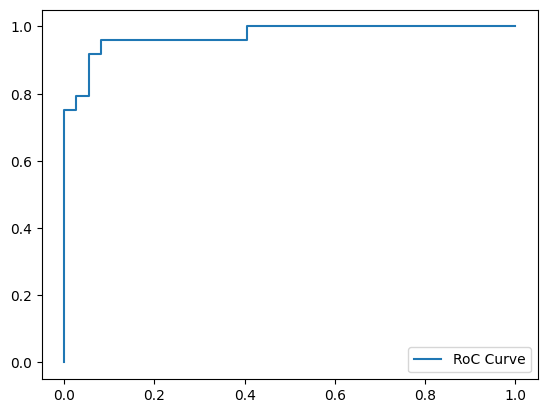

In [36]:
from sklearn.metrics import roc_curve

# get the probabilities
y_pred_probabilities = model.predict_proba(x_test)[:, 1]

# get fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)

# draw the curv
plt.plot(fpr, tpr, label="RoC Curve")
plt.legend()

In [13]:
thresholds

NameError: name 'thresholds' is not defined

In [37]:
from sklearn.metrics import roc_auc_score

# get the roc score
roc_score = roc_auc_score(y_test, y_pred_probabilities)
print(f"roc score = {roc_score}")

roc score = 0.9718468468468469


### result visualization

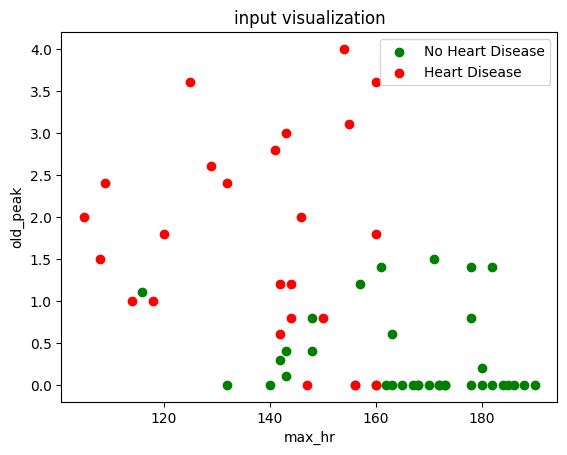

In [38]:
plt.scatter(x_test['max_hr'][y_test == 0], x_test['old_peak'][y_test == 0], color="green", label="No Heart Disease")
plt.scatter(x_test['max_hr'][y_test == 1], x_test['old_peak'][y_test == 1], color="red", label="Heart Disease")

plt.xlabel('max_hr')
plt.ylabel('old_peak')
plt.title('input visualization')
plt.legend()

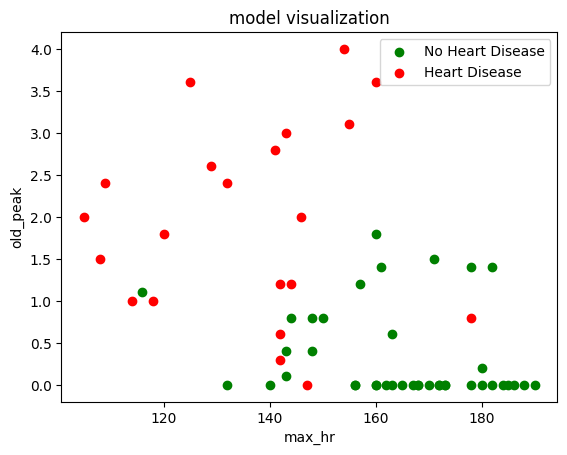

In [40]:
plt.scatter(x_test['max_hr'][y_pred == 0], x_test['old_peak'][y_pred == 0], color="green", label="No Heart Disease")
plt.scatter(x_test['max_hr'][y_pred == 1], x_test['old_peak'][y_pred == 1], color="red", label="Heart Disease")

plt.xlabel('max_hr')
plt.ylabel('old_peak')
plt.title('model visualization')
plt.legend()